# Analyse de données textuelles avec python

Dans le cadre de ce notebook, nous allons analyser plusieurs jeux de données textuelles avec différentes approches :
    - création d'un wordcloud
    - extraction des mots
    - exploration de données textuelles
    - manipulation de dataframes pour les données textuelles
    - création d'un classifieur en utilisant des données textuelles

Pour toutes ces étapes, nous utiliserons de nombreuses bibliothèques dont principalement :
    - nltk
    - scikit-learn

## Créer un wordcloud à partir de données

On importe les bibliothèques nécessaires

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

On importe les données depuis une base sqlite

Il s'agit des emails de Hilary Clinton

In [42]:
con = create_engine('sqlite:///./data/database.sqlite')

In [43]:
con.table_names()

['Aliases', 'EmailReceivers', 'Emails', 'Persons']

In [5]:
emails=pd.read_sql_query("select * from emails",con)

In [6]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 22 columns):
Id                              7945 non-null int64
DocNumber                       7945 non-null object
MetadataSubject                 7945 non-null object
MetadataTo                      7945 non-null object
MetadataFrom                    7945 non-null object
SenderPersonId                  7945 non-null object
MetadataDateSent                7945 non-null object
MetadataDateReleased            7945 non-null object
MetadataPdfLink                 7945 non-null object
MetadataCaseNumber              7945 non-null object
MetadataDocumentClass           7945 non-null object
ExtractedSubject                7945 non-null object
ExtractedTo                     7945 non-null object
ExtractedFrom                   7945 non-null object
ExtractedCc                     7945 non-null object
ExtractedDateSent               7945 non-null object
ExtractedCaseNumber             7945 non-null 

On met en commun tous les mots dans une grande chaîne de caractères

In [8]:
cs = ""
for i in range(len(emails.ExtractedBodyText)):
    cs += str(emails.ExtractedBodyText[i])

## Quelques bases en traitement des données textuelles

Pour commencer, on importe les bibliothèques dont on aura besoin dans cet exemple

In [57]:
# On utilise la bibliothèque nltk qui est la référence en terme de traitement de données textuelles
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import PorterStemmer
import string
print("J'ai bien importé nltk et string")

J'ai bien importé nltk et string


In [10]:
import nltk

In [58]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [59]:
# On utilise ensuite une bibliothèque de data visualisation matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("J'ai bien importé matplotlib")


J'ai bien importé matplotlib


Les étapes pour explorer des données textuelles :
    1. Charger les données
    2. Tokeniser
    3. Compter
    4. Eliminer les stopwords
    5. Normalisation du texte
    6. Utilisation des n-grams (suite de n mots)

On compte le nombre de mots

In [13]:
from nltk.tokenize import word_tokenize

all_tokens = [t for t in word_tokenize(cs)]

print("Nombre total de tokens: {}".format(len(all_tokens)))

Nombre total de tokens: 689167


On vérifie la fréquence des mots

In [60]:
from collections import Counter

total_term_frequency = Counter(all_tokens)

for word, freq in total_term_frequency.most_common(30):
    print("{}\t{}".format(word, freq))

,	29865
the	28254
.	25774
to	16892
and	13895
of	13796
a	10677
in	9695
that	6349
is	5876
's	5733
for	5724
on	5035
I	4538
:	4160
''	4123
with	3950
``	3678
you	3661
it	3178
as	3086
be	2959
have	2955
The	2950
was	2821
are	2557
)	2474
will	2417
he	2404
this	2401


On voit qu'il y a un certain nombre de termes posant problème

Il s'agit de la ponctuation et des stopword

In [64]:
from nltk.corpus import stopwords
import string

print(stopwords.words('english'))
print(len(stopwords.words('english')))
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
#on va donc supprimer la ponctuation et les stopwords
stop_list = stopwords.words('english') + list(string.punctuation) + ["'s","''","``","n't","--","—","would"]

tokens_no_stop = [token for token in all_tokens
                        if token.lower() not in stop_list]

total_term_frequency_no_stop = Counter(tokens_no_stop)

for word, freq in total_term_frequency_no_stop.most_common(40):
    print("{}\t{}".format(word, freq))

pm	1465
said	1227
Obama	1209
Secretary	1163
State	1075
one	950
U.S.	893
2010	848
2009	847
call	817
Department	816
also	813
people	783
time	780
get	717
like	713
•	711
know	689
Office	674
Clinton	673
new	668
could	665
work	664
PM	654
House	635
government	614
H	608
President	602
American	588
think	564
see	562
first	546
state.gov	535
last	535
United	533
want	533
two	532
today	529
back	524
support	517


On veut normaliser le texte un peu plus

In [68]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
all_tokens_lower = [t.lower() for t in all_tokens]

tokens_normalised = [stemmer.stem(t) for t in all_tokens_lower
                                     if t not in stop_list]

total_term_frequency_normalised = Counter(tokens_normalised)

for word, freq in total_term_frequency_normalised.most_common(20):
    print("{}\t{}".format(word, freq))

state	2235
pm	2125
call	1529
secretari	1383
time	1316
work	1258
offic	1255
said	1235
obama	1222
depart	1220
presid	1203
one	1136
new	1096
meet	1054
hous	984
also	980
like	974
get	954
u.s.	893
say	893


### Une autre approche : l'utilisation d'un dataframe

On peut aussi travailler sur le DataFrame complet

In [24]:
extr2 = pd.read_sql_query("Select * From Emails",con)

On crée une nouvelle variable

In [25]:
extr2["WithPresident"]=np.where(extr2["ExtractedBodyText"].str.count("President")>0,1,0)

In [26]:
extr2["WithPresident"].value_counts()

0    7660
1     285
Name: WithPresident, dtype: int64

On crée une seconde variable

In [27]:
extr2['length'] = extr2['ExtractedBodyText'].apply(len)

In [28]:
extr2['length'].describe()

count     7945.000000
mean       452.433103
std       2442.636470
min          0.000000
25%          7.000000
50%         59.000000
75%        165.000000
max      78834.000000
Name: length, dtype: float64

### On peut représenter des histogrammes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9DC911D68>,
      dtype=object)

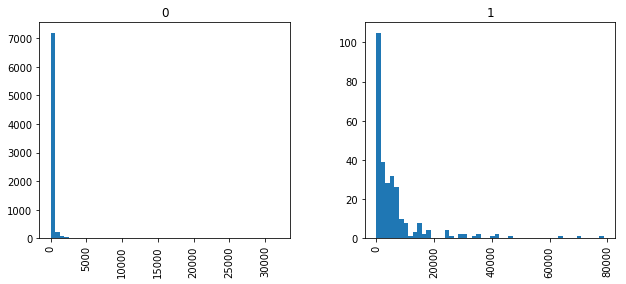

In [29]:
extr2.hist(column='length', by='WithPresident', bins=50,figsize=(10,4))

## Les n-grams

Une autre approche est de travailler sur des n-grams

In [71]:
from nltk import ngrams

phrases = Counter(ngrams(tokens_no_stop, 2))
for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('Secretary', 'Office')	456
('United', 'States')	445
('State', 'Department')	440
('White', 'House')	411
('Department', 'State')	287
('pm', 'Secretary')	277
('U.S.', 'Department')	261
('PM', 'H')	219
('New', 'York')	217
('DEPT', 'PRODUCED')	216
('PRODUCED', 'HOUSE')	216
('HOUSE', 'SELECT')	216
('SELECT', 'BENGHAZI')	216
('BENGHAZI', 'COMM')	216
('SUBJECT', 'AGREEMENT')	216
('AGREEMENT', 'SENSITIVE')	216
('SENSITIVE', 'INFORMATION')	216
('INFORMATION', 'REDACTIONS')	216
('REDACTIONS', 'FOIA')	216
('FOIA', 'WAIVER')	216


On peut aussi le faire sans les stopwords

In [72]:
phrases = Counter(ngrams(tokens_no_stop, 3))

for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('U.S.', 'Department', 'State')	258
('pm', 'Secretary', 'Office')	220
('DEPT', 'PRODUCED', 'HOUSE')	216
('PRODUCED', 'HOUSE', 'SELECT')	216
('HOUSE', 'SELECT', 'BENGHAZI')	216
('SELECT', 'BENGHAZI', 'COMM')	216
('SUBJECT', 'AGREEMENT', 'SENSITIVE')	216
('AGREEMENT', 'SENSITIVE', 'INFORMATION')	216
('SENSITIVE', 'INFORMATION', 'REDACTIONS')	216
('INFORMATION', 'REDACTIONS', 'FOIA')	216
('REDACTIONS', 'FOIA', 'WAIVER')	216
('Case', 'F-2015-04841', 'Doc')	215
('STATE', 'DEPT', 'PRODUCED')	215
('Department', 'State', 'Case')	212
('State', 'Case', 'F-2015-04841')	212
('BENGHAZI', 'COMM', 'SUBJECT')	212
('COMM', 'SUBJECT', 'AGREEMENT')	212
('Date', '05/13/2015', 'STATE')	211
('05/13/2015', 'STATE', 'DEPT')	211
('Secretary', 'Conference', 'Room')	136


## Utilisation du machine learning

Essayons de construire un premier classifieur pour les emails

On utilise scikit-learn et un modèle du type SVM

On va essayer de prédire si un SMS est un spam ou non

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

On récupère les données

In [33]:
messages = pd.read_csv('./data/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
from sklearn.model_selection import train_test_split

On divise les données apprentissage / test

In [35]:
x_train, x_test, y_train, y_test = train_test_split(messages["message"],messages["label"], test_size=0.2)

On utilise une méthode classique de traitement de données textuelles
TF-IDF term frequency-inverse document frequency
Il s'agit d'une méthode de feature extraction qui permet d'extraire des fréquences à partir de textes
TF fréquence du mot dans le texte
IDF importance du mot dans le corpus complet


In [36]:
vectorizer = TfidfVectorizer()
vectorised_train_data = vectorizer.fit_transform(x_train)
vectorised_test_data = vectorizer.transform(x_test)

In [37]:
vectorised_test_data

<1115x7764 sparse matrix of type '<class 'numpy.float64'>'
	with 13566 stored elements in Compressed Sparse Row format>

On crée un modèle de classification, ici SVM

In [38]:
classifier = LinearSVC()
classifier.fit(vectorised_train_data, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [39]:
from sklearn.metrics import recall_score, confusion_matrix

In [40]:
#on affiche la matrice de confusion
confusion_matrix(classifier.predict(vectorised_test_data),y_test)

array([[964,  12],
       [  4, 135]], dtype=int64)

On a créé un classifieur qui semble assez efficace

Essayez avec un random forrest

In [41]:
from sklearn.ensemble import RandomForestClassifier

...